In [21]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [22]:
X_train =X_train/255
X_test =X_test/255

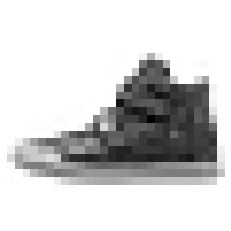

In [23]:
import matplotlib.pyplot as plt
plt.imshow(X_train[142], cmap="binary")
plt.axis('off')
plt.show()

In [24]:
class_names = ["koszulka", "spodnie", "pulower", "sukienka", "kurtka",
               "sandał", "koszula", "but", "torba", "kozak"]
class_names[y_train[142]]

'but'

In [25]:
import keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


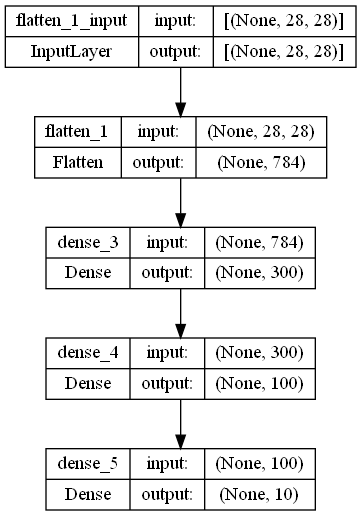

In [26]:
model.summary()
tf.keras.utils.plot_model(model, "fashion_mnist.png", show_shapes=True)

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [28]:
import os
root_logdir = os.path.join(os.curdir, "image_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [29]:
model.fit(X_train, y_train, epochs = 20,
                    validation_split = 0.1, callbacks=[tensorboard_cb])

Epoch 1/20
1688/1688 [==============================] - 2s 988us/step - loss: 0.7183 - accuracy: 0.7666 - val_loss: 0.5164 - val_accuracy: 0.8262
Epoch 2/20
1688/1688 [==============================] - 2s 935us/step - loss: 0.4868 - accuracy: 0.8321 - val_loss: 0.4592 - val_accuracy: 0.8405
Epoch 3/20
1688/1688 [==============================] - 2s 945us/step - loss: 0.4409 - accuracy: 0.8464 - val_loss: 0.4372 - val_accuracy: 0.8482
Epoch 4/20
1688/1688 [==============================] - 2s 941us/step - loss: 0.4141 - accuracy: 0.8564 - val_loss: 0.4379 - val_accuracy: 0.8390
Epoch 5/20
1688/1688 [==============================] - 2s 943us/step - loss: 0.3931 - accuracy: 0.8621 - val_loss: 0.4201 - val_accuracy: 0.8527
Epoch 6/20
1688/1688 [==============================] - 2s 960us/step - loss: 0.3779 - accuracy: 0.8680 - val_loss: 0.4011 - val_accuracy: 0.8570
Epoch 7/20
1688/1688 [==============================] - 2s 965us/step - loss: 0.3638 - accuracy: 0.8718 - val_loss: 0.3813 -

1/1 [==============================] - 0s 26ms/step
Prediction: kozak
Confidence: 0.99697614
Truth: kozak


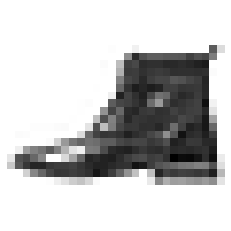

In [30]:
import numpy as np
image_index = np.random.randint(len(X_test))
image = np.array([X_test[image_index]])
confidences = model.predict(image)
confidence = np.max(confidences[0])
prediction = np.argmax(confidences[0])
print("Prediction:", class_names[prediction])
print("Confidence:", confidence)
print("Truth:", class_names[y_test[image_index]])
plt.imshow(image[0], cmap="binary")
plt.axis('off')
plt.show()

In [31]:
model.save('fashion_clf.h5')

In [32]:
#Regresja

In [33]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

In [34]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [36]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(1, activation="softmax"))
model.compile(loss="mean_absolute_error", optimizer="sgd")

In [37]:
es = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, verbose=1)

In [38]:
root_logdir = os.path.join(os.curdir, "housing_logs")
run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
model.fit(X_train, y_train, epochs=20, validation_data=(
    X_valid, y_valid), callbacks=[es, tensorboard_cb])
model.save("reg_housing_1.h5")

Epoch 1/20
363/363 [==============================] - 0s 760us/step - loss: 1.1628 - val_loss: 1.1228
Epoch 2/20
363/363 [==============================] - 0s 631us/step - loss: 1.1628 - val_loss: 1.1228
Epoch 3/20
363/363 [==============================] - 0s 648us/step - loss: 1.1628 - val_loss: 1.1228
Epoch 4/20
363/363 [==============================] - 0s 660us/step - loss: 1.1628 - val_loss: 1.1228
Epoch 5/20
363/363 [==============================] - 0s 653us/step - loss: 1.1628 - val_loss: 1.1228
Epoch 6/20
363/363 [==============================] - 0s 646us/step - loss: 1.1628 - val_loss: 1.1228
Epoch 6: early stopping


In [39]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(1, activation="softmax"))
model.compile(loss="mean_absolute_error", optimizer="sgd")
model.fit(X_train, y_train, epochs=20, validation_data=(
    X_valid, y_valid), callbacks=[es, tensorboard_cb])
model.save("reg_housing_2.h5")

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.1628 - val_loss: 1.1228
Epoch 2/20
363/363 [==============================] - 0s 841us/step - loss: 1.1628 - val_loss: 1.1228
Epoch 3/20
363/363 [==============================] - 0s 857us/step - loss: 1.1628 - val_loss: 1.1228
Epoch 4/20
363/363 [==============================] - 0s 852us/step - loss: 1.1628 - val_loss: 1.1228
Epoch 5/20
363/363 [==============================] - 0s 853us/step - loss: 1.1628 - val_loss: 1.1228
Epoch 6/20
363/363 [==============================] - 0s 883us/step - loss: 1.1628 - val_loss: 1.1228
Epoch 6: early stopping


In [40]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(5, activation="relu"))
model.add(keras.layers.Dense(1, activation="softmax"))
model.compile(loss="mean_absolute_error", optimizer="sgd")
model.fit(X_train, y_train, epochs=20, validation_data=(
    X_valid, y_valid), callbacks=[es, tensorboard_cb])
model.save("reg_housing_3.h5")

Epoch 1/20
363/363 [==============================] - 0s 792us/step - loss: 1.1628 - val_loss: 1.1228
Epoch 2/20
363/363 [==============================] - 0s 629us/step - loss: 1.1628 - val_loss: 1.1228
Epoch 3/20
363/363 [==============================] - 0s 653us/step - loss: 1.1628 - val_loss: 1.1228
Epoch 4/20
363/363 [==============================] - 0s 631us/step - loss: 1.1628 - val_loss: 1.1228
Epoch 5/20
363/363 [==============================] - 0s 631us/step - loss: 1.1628 - val_loss: 1.1228
Epoch 6/20
363/363 [==============================] - 0s 643us/step - loss: 1.1628 - val_loss: 1.1228
Epoch 6: early stopping
